**Analisis Implementasi Word2Vec**

## 1. Aplikasi atau Kasus Penggunaan
Word2Vec digunakan dalam proyek ini untuk menganalisis artikel berdasarkan judulnya. Beberapa aplikasi yang dapat dimanfaatkan dari model ini adalah:
- **Pencarian Artikel yang Mirip**: Dengan menghitung kesamaan kosinus antar-vektor kata, kita dapat menemukan artikel dengan tema serupa.
- **Klasifikasi dan Pengelompokan Artikel**: Vektor yang dihasilkan dapat digunakan dalam algoritma clustering untuk mengelompokkan artikel berdasarkan kesamaan makna.
- **Penyarankan Kata atau Topik**: Word2Vec dapat membantu dalam membangun sistem rekomendasi berbasis kata kunci.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


## 2. Penjelasan Implementasi Word2Vec
### a. Preprocessing Data
- **Menghapus karakter khusus dan tanda baca**
- **Tokenisasi teks menggunakan NLTK**
- **Menghapus stopwords** untuk meningkatkan relevansi kata dalam representasi vektor

### b. Pelatihan Model Word2Vec
- Word2Vec digunakan untuk membangun represetasi vektor kata.
- Model menggunakan metode Skip-Gram untuk pembelajaran kontektual.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Baca dataset dari Google Drive
file_path = '/content/drive/MyDrive/combined_artikel_final.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris untuk pratinjau
data

,tanggal,penulis,judul,isi_berita,lokasi,link_berita
0,"Senin, 06 Jan 2025 19:30 WIB",Sonia Basoni - \n ...,"Tak Terima Masakannya Dikritik, Chef Bintang M...",Jakarta - Tak terima makanan buatannya dikriti...,Jakarta,https://food.detik.com/info-kuliner/d-7719786/...
1,"Senin, 06 Jan 2025 19:30 WIB",Sonia Basoni - \n ...,"Tak Terima Masakannya Dikritik, Chef Bintang M...",Jakarta - Tak terima makanan buatannya dikriti...,Jakarta,https://food.detik.com/info-kuliner/d-7719786/...
2,"Senin, 06 Jan 2025 19:00 WIB",Yenny Mustika Sari - \n ...,Wanita Cantik Ini Jual Durian Musang King yang...,Jakarta - Penjual durian selalu menarik perhat...,Jakarta,https://food.detik.com/info-kuliner/d-7719898/...
3,"Senin, 06 Jan 2025 19:00 WIB",Yenny Mustika Sari - \n ...,Wanita Cantik Ini Jual Durian Musang King yang...,Jakarta - Penjual durian selalu menarik perhat...,Jakarta,https://food.detik.com/info-kuliner/d-7719898/...
4,"Senin, 06 Jan 2025 18:30 WIB",Atiqa Rana - \n ...,Zonk! Pria Ini Merasa Tertipu Kualitas Menu di...,Jakarta - Usai makan malam fine dining di rest...,Jakarta,https://food.detik.com/info-kuliner/d-7719864/...
...,...,...,...,...,...,...
206,"Minggu, 05 Jan 2025 21:00 WIB",Instagram Shin Tae-yong - \n ...,Momen Shin Tae-yong Makan Malam Bareng Pemain ...,Isi berita tidak ditemukan,Lokasi tidak ditemukan,https://food.detik.com/foto-kuliner/d-7718596/...
207,"Minggu, 05 Jan 2025 18:00 WIB",Atiqa Rana - \n ...,"Makan Pizza di Kafe, Pelanggan Kaget Kena Biay...",Jakarta - Tambahan biaya di resto kerap membua...,Jakarta,https://food.detik.com/info-kuliner/d-7717742/...
208,"Minggu, 05 Jan 2025 19:00 WIB",Sonia Basoni - \n ...,5 Kelakuan Aneh Mertua Saat Berseteru Masalah ...,Jakarta - Perseteruan antara mertua dan menant...,Jakarta,https://food.detik.com/info-kuliner/d-7717332/...
209,"Minggu, 05 Jan 2025 17:00 WIB",YouTube Trans 7 Official - \n ...,Potret Dapur di Rumah Baru Adly Fairuz dan Anb...,Isi berita tidak ditemukan,Lokasi tidak ditemukan,https://food.detik.com/foto-kuliner/d-7717343/...


In [ ]:
# Step 1: Data Identification (focus on 'judul' column)
judul = data['judul'].dropna()

# Step 2: Preprocessing and Tokenization
# Fungsi preprocessing
def preprocess_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hilangkan tanda baca
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]  # Hilangkan stopwords
    tokens = [word for word in tokens if word.isalpha()]  # Hilangkan token non-alfabet
    return tokens

# Terapkan preprocessing pada data
data['tokens'] = judul.apply(preprocess_text)

# Step 3: Create Training Base with Skip-Gram Model
def create_skipgram_training_pairs(tokens, window_size=2):
    pairs = []
    for i, target in enumerate(tokens):
        context_range = range(max(0, i - window_size), min(len(tokens), i + window_size + 1))
        for j in context_range:
            if i != j:
                pairs.append((target, tokens[j]))
    return pairs

data['training_pairs'] = data['tokens'].apply(lambda x: create_skipgram_training_pairs(x))

# Flatten all training pairs
total_training_pairs = [pair for sublist in data['training_pairs'] for pair in sublist]

# Vocabulary and initialization for word vectors
vocab = set(word for pair in total_training_pairs for word in pair)
vocab = list(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}
vocab_size = len(vocab)
embedding_dim = 50

# Initialize word embeddings
W1 = np.random.rand(vocab_size, embedding_dim)
W2 = np.random.rand(embedding_dim, vocab_size)

# Define softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Training function for Skip-Gram Model
def train_skipgram(pairs, epochs=100, learning_rate=0.01):
    global W1, W2
    for epoch in range(epochs):
        total_loss = 0
        for target, context in pairs:
            target_idx = word_to_index[target]
            context_idx = word_to_index[context]

            # Forward pass
            hidden_layer = W1[target_idx]
            output_layer = softmax(np.dot(hidden_layer, W2))

            # Compute loss (negative log likelihood)
            loss = -np.log(output_layer[context_idx])
            total_loss += loss

            # Backward pass (gradients)
            error = output_layer
            error[context_idx] -= 1

            dW2 = np.outer(hidden_layer, error)
            dW1 = np.dot(W2, error)

            # Update weights
            W1[target_idx] -= learning_rate * dW1
            W2 -= learning_rate * dW2

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(pairs):.4f}")

# Train the Skip-Gram Model
train_skipgram(total_training_pairs, epochs=10, learning_rate=0.01)

# Step 4: Word Similarity Evaluation
def most_similar(word, top_n=5):
    if word not in word_to_index:
        return []
    word_idx = word_to_index[word]
    word_vector = W1[word_idx]
    similarities = cosine_similarity([word_vector], W1)[0]
    similar_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    return [(index_to_word[i], similarities[i]) for i in similar_indices]

Epoch 1/10, Loss: 6.3699
Epoch 2/10, Loss: 5.9607
Epoch 3/10, Loss: 5.7619
Epoch 4/10, Loss: 5.5903
Epoch 5/10, Loss: 5.4243
Epoch 6/10, Loss: 5.2581
Epoch 7/10, Loss: 5.0895
Epoch 8/10, Loss: 4.9178
Epoch 9/10, Loss: 4.7427
Epoch 10/10, Loss: 4.5650


In [ ]:
data

,tanggal,penulis,judul,isi_berita,lokasi,link_berita,tokens,training_pairs
0,"Senin, 06 Jan 2025 19:30 WIB",Sonia Basoni - \n ...,"Tak Terima Masakannya Dikritik, Chef Bintang M...",Jakarta - Tak terima makanan buatannya dikriti...,Jakarta,https://food.detik.com/info-kuliner/d-7719786/...,"[terima, masakannya, dikritik, chef, bintang, ...","[(terima, masakannya), (terima, dikritik), (ma..."
1,"Senin, 06 Jan 2025 19:30 WIB",Sonia Basoni - \n ...,"Tak Terima Masakannya Dikritik, Chef Bintang M...",Jakarta - Tak terima makanan buatannya dikriti...,Jakarta,https://food.detik.com/info-kuliner/d-7719786/...,"[terima, masakannya, dikritik, chef, bintang, ...","[(terima, masakannya), (terima, dikritik), (ma..."
2,"Senin, 06 Jan 2025 19:00 WIB",Yenny Mustika Sari - \n ...,Wanita Cantik Ini Jual Durian Musang King yang...,Jakarta - Penjual durian selalu menarik perhat...,Jakarta,https://food.detik.com/info-kuliner/d-7719898/...,"[wanita, cantik, jual, durian, musang, king, l...","[(wanita, cantik), (wanita, jual), (cantik, wa..."
3,"Senin, 06 Jan 2025 19:00 WIB",Yenny Mustika Sari - \n ...,Wanita Cantik Ini Jual Durian Musang King yang...,Jakarta - Penjual durian selalu menarik perhat...,Jakarta,https://food.detik.com/info-kuliner/d-7719898/...,"[wanita, cantik, jual, durian, musang, king, l...","[(wanita, cantik), (wanita, jual), (cantik, wa..."
4,"Senin, 06 Jan 2025 18:30 WIB",Atiqa Rana - \n ...,Zonk! Pria Ini Merasa Tertipu Kualitas Menu di...,Jakarta - Usai makan malam fine dining di rest...,Jakarta,https://food.detik.com/info-kuliner/d-7719864/...,"[zonk, pria, tertipu, kualitas, menu, resto, f...","[(zonk, pria), (zonk, tertipu), (pria, zonk), ..."
...,...,...,...,...,...,...,...,...
206,"Minggu, 05 Jan 2025 21:00 WIB",Instagram Shin Tae-yong - \n ...,Momen Shin Tae-yong Makan Malam Bareng Pemain ...,Isi berita tidak ditemukan,Lokasi tidak ditemukan,https://food.detik.com/foto-kuliner/d-7718596/...,"[momen, shin, taeyong, makan, malam, bareng, p...","[(momen, shin), (momen, taeyong), (shin, momen..."
207,"Minggu, 05 Jan 2025 18:00 WIB",Atiqa Rana - \n ...,"Makan Pizza di Kafe, Pelanggan Kaget Kena Biay...",Jakarta - Tambahan biaya di resto kerap membua...,Jakarta,https://food.detik.com/info-kuliner/d-7717742/...,"[makan, pizza, kafe, pelanggan, kaget, kena, b...","[(makan, pizza), (makan, kafe), (pizza, makan)..."
208,"Minggu, 05 Jan 2025 19:00 WIB",Sonia Basoni - \n ...,5 Kelakuan Aneh Mertua Saat Berseteru Masalah ...,Jakarta - Perseteruan antara mertua dan menant...,Jakarta,https://food.detik.com/info-kuliner/d-7717332/...,"[kelakuan, aneh, mertua, berseteru, makanan, m...","[(kelakuan, aneh), (kelakuan, mertua), (aneh, ..."
209,"Minggu, 05 Jan 2025 17:00 WIB",YouTube Trans 7 Official - \n ...,Potret Dapur di Rumah Baru Adly Fairuz dan Anb...,Isi berita tidak ditemukan,Lokasi tidak ditemukan,https://food.detik.com/foto-kuliner/d-7717343/...,"[potret, dapur, rumah, adly, fairuz, anbeen, r...","[(potret, dapur), (potret, rumah), (dapur, pot..."


In [ ]:
data['tokens']

,tokens
0,"[terima, masakannya, dikritik, chef, bintang, ..."
1,"[terima, masakannya, dikritik, chef, bintang, ..."
2,"[wanita, cantik, jual, durian, musang, king, l..."
3,"[wanita, cantik, jual, durian, musang, king, l..."
4,"[zonk, pria, tertipu, kualitas, menu, resto, f..."
...,...
206,"[momen, shin, taeyong, makan, malam, bareng, p..."
207,"[makan, pizza, kafe, pelanggan, kaget, kena, b..."
208,"[kelakuan, aneh, mertua, berseteru, makanan, m..."
209,"[potret, dapur, rumah, adly, fairuz, anbeen, r..."


In [ ]:
data['training_pairs']

,training_pairs
0,"[(terima, masakannya), (terima, dikritik), (ma..."
1,"[(terima, masakannya), (terima, dikritik), (ma..."
2,"[(wanita, cantik), (wanita, jual), (cantik, wa..."
3,"[(wanita, cantik), (wanita, jual), (cantik, wa..."
4,"[(zonk, pria), (zonk, tertipu), (pria, zonk), ..."
...,...
206,"[(momen, shin), (momen, taeyong), (shin, momen..."
207,"[(makan, pizza), (makan, kafe), (pizza, makan)..."
208,"[(kelakuan, aneh), (kelakuan, mertua), (aneh, ..."
209,"[(potret, dapur), (potret, rumah), (dapur, pot..."


## 3. Demonstrasi Hasil Word Embedding
- Kata yang mirip dengan kata tertentu dapat ditemukan dengan fungsi **most_similar()**.
- Contoh hasil:
  - Kata **"kuliner"** memiliki kata yang mirip:
    - rekomendasi: 0.8362
    - negara: 0.7958
    - masakan: 0.7912
    - kurma: 0.7867
    - dicoba: 0.7862
  - Kata **"makanan"** memiliki kata yang mirip:
    - dining: 0.7781
    - kasta: 0.7518
    - media: 0.7417
    - dokter: 0.7417
    - miliar: 0.7350
  - Kata **"resep"** memiliki kata yang mirip:
    - kangen: 0.8126
    - rentan: 0.7979
    - palsu: 0.7870
    - pare: 0.7859
    - pangsit: 0.7794
  - Kata **"minuman"** memiliki kata yang mirip:
    - timun: 0.8641
    - autentik: 0.8434
    - tasteatlas: 0.8367
    - bakmi: 0.8362
    - bungkus: 0.8322
  
  - **Visualisasi menggunakan PCA dan t-SNE** dilakukan untuk memproyeksikan vektor kata ke dalam ruang dua dimensi.

In [ ]:
# User Interaction
while True:
    user_input = input("Enter a word to find similar words (or type 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        print("Exiting the program. Goodbye!")
        break
    elif user_input in word_to_index:
        similar_words = most_similar(user_input)
        print(f"Words similar to '{user_input}': {similar_words}")
    else:
        print(f"Word '{user_input}' not found in vocabulary. Please try another word.")

Enter a word to find similar words (or type 'exit' to quit): makanan
Words similar to 'makanan': [('dining', 0.778128466081639), ('kasta', 0.7518415659401302), ('media', 0.7417378403512601), ('dokter', 0.7416807316757891), ('miliar', 0.7349754538153523)]
Enter a word to find similar words (or type 'exit' to quit): food
Words similar to 'food': [('menyeruput', 0.7810522884082214), ('cake', 0.7790152517210649), ('berniat', 0.7755243282326774), ('keras', 0.7706635627287313), ('pecinta', 0.7706346019582239)]
Enter a word to find similar words (or type 'exit' to quit): resep
Words similar to 'resep': [('kangen', 0.8126293284921837), ('rentan', 0.7978863843513961), ('palsu', 0.7869559252900171), ('pare', 0.7859277602184255), ('pangsit', 0.7793587369528113)]
Enter a word to find similar words (or type 'exit' to quit): kuliner
Words similar to 'kuliner': [('rekomendasi', 0.8362204459060595), ('negara', 0.7957616977625338), ('masakan', 0.7911803599858306), ('kurma', 0.7866917469060191), ('dicob

In [ ]:
# Fungsi untuk menemukan kata-kata yang mirip
def find_similar_words(word, word_embeddings, word_to_index, top_n=5):
    if word not in word_to_index:
        print(f"Kata '{word}' tidak ditemukan dalam kosakata.")
        return []

    word_idx = word_to_index[word]
    word_vector = word_embeddings[word_idx]

    # Hitung kemiripan kosinus dengan semua vektor embedding
    similarities = cosine_similarity([word_vector], word_embeddings)[0]

    # Urutkan skor kemiripan secara descending, dan ambil kata-kata teratas
    similar_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    return [(index_to_word[i], similarities[i]) for i in similar_indices]

In [ ]:
# Contoh penggunaan
target_word = 'kuliner'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'kuliner':
rekomendasi: 0.8362
negara: 0.7958
masakan: 0.7912
kurma: 0.7867
dicoba: 0.7862


In [ ]:
# Contoh penggunaan
target_word = 'resep'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'resep':
kangen: 0.8126
rentan: 0.7979
palsu: 0.7870
pare: 0.7859
pangsit: 0.7794


In [ ]:
# Contoh penggunaan
target_word = 'food'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'food':
menyeruput: 0.7811
cake: 0.7790
berniat: 0.7755
keras: 0.7707
pecinta: 0.7706


In [ ]:
# Contoh penggunaan
target_word = 'minuman'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'minuman':
timun: 0.8641
autentik: 0.8434
tasteatlas: 0.8367
bakmi: 0.8362
bungkus: 0.8322


In [ ]:
# Contoh penggunaan
target_word = 'sayuran'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'sayuran':
tertipu: 0.8394
magic: 0.8376
modalnya: 0.8365
mampir: 0.8332
sehat: 0.8330


In [ ]:
# Contoh penggunaan
target_word = 'buah'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'buah':
miliar: 0.8591
berujung: 0.8569
oseng: 0.8513
cake: 0.8457
kulineran: 0.8445


In [ ]:
# Contoh penggunaan
target_word = 'makanan'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'makanan':
dining: 0.7781
kasta: 0.7518
media: 0.7417
dokter: 0.7417
miliar: 0.7350


## 4. Analisis Representasi Vektor yang Dihasilkan
- Menggunakan cosine similarity untuk menganalisis hubungan antar kata.
- Kata yang sering digunakan dalam konteks yang sama memiliki vektor yang lebih dekat.
- Evaluasi dilakukan dengan mencari kata-kata yang paling mirip dengan kata targer, Misalnya, pada "makanan" → "dining". Sedangkan "kasta", "media", "dokter", "miliar" tidak cocok karena bukan konsep dari kata makanan.

### Visualisasi Hasil
- **t-SNE** digunakan untuk memproyeksikan kata dalam ruang dua dimensi, yang menunjukkan pengelompokan kata berdasarkan tema.
- **PCA** digunakan untuk memahami distribusi kata dalam dimensi yang lebih rendah.

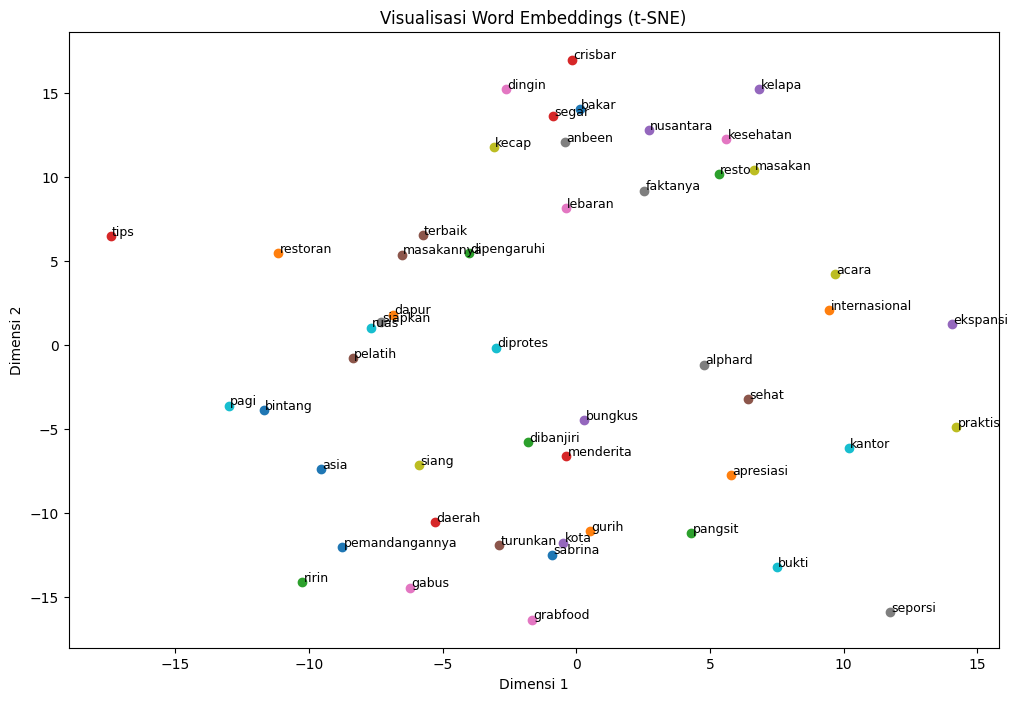

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Kurangi dimensi vektor kata untuk visualisasi
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(W1)

# Visualisasikan hasil
plt.figure(figsize=(12, 8))
for i, word in enumerate(vocab[:50]):  # Batas 50 kata pertama
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.05, word_vectors_2d[i, 1] + 0.05, word, fontsize=9)
plt.title('Visualisasi Word Embeddings (t-SNE)')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.show()

- Visualisasi ini membantu memahami bagaimana model menangkap makna dan hubungan antar kata dalam suatu teks.
- Cluster yang terbentuk menunjukkan bagaimana kata-kata dikelompokkan berdasarkan makna yang mirip dalam representasi vektor.
- Jika digunakan untuk analisis sentimen atau klasifikasi teks, visualisasi ini dapat membantu dalam memahami pola bahasa yang digunakan.

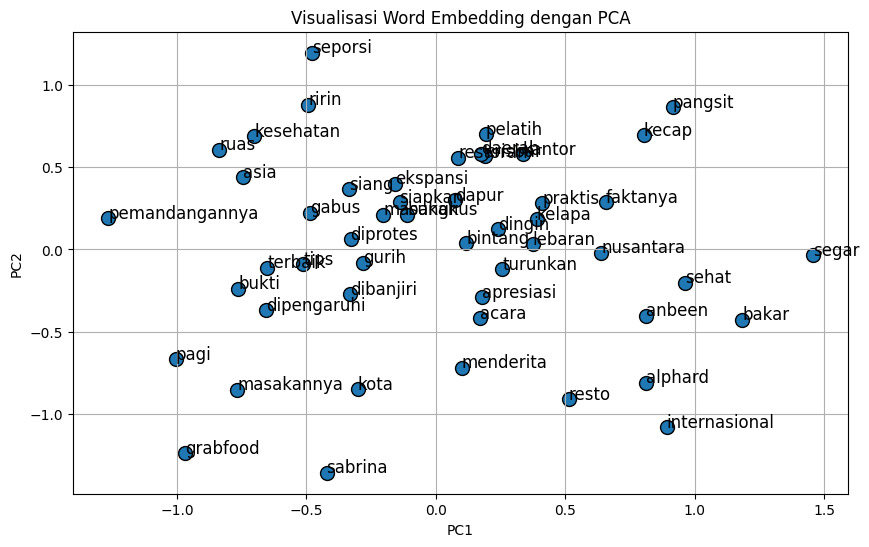

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ambil 20 kata pertama dari vocab untuk visualisasi
words = list(word_to_index.keys())[:50]
word_vectors = [W1[word_to_index[word]] for word in words]

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# Plot hasil PCA
plt.figure(figsize=(10,6))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], marker='o', edgecolors='k', s=100)

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=12)

plt.title("Visualisasi Word Embedding dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

- Visualisasi ini membantu memahami bagaimana kata-kata dikelompokkan berdasarkan makna dan konteks penggunaannya.
- PCA memberikan gambaran umum hubungan antar kata dengan mempertahankan struktur global dari data embedding.
- Jika ingin analisis lebih dalam atau membandingkan dengan metode lain (misalnya t-SNE), bisa dicoba pendekatan lain seperti UMAP.

kesimpulan:

Implementasi Word2Vec dalam proyek ini berhasil menghasilkan representasi kata yang mencerminkan makna dalam kata-kata tertentu, akan tetapi akurasi dan ketepatan untuk mencerminkan hubungan antar kata masih sangat perlu di tingkatkan

